In [1]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely import geometry
import geopandas as gpd
import geodatasets

In [2]:
crime_data = pd.read_csv('../../data/pre_training/pre_aggregation_crime_data.csv')

In [3]:
top_features = [
    'bus_stops_distance_0.1',
    'alleylights_distance_0.1',
    'police_stations_distance_1',
    'streetlights_oneout_distance_0.1',
    'streetlights_allout_distance_0.5',
    'streetlights_oneout_distance_0.3',
    'streetlights_allout_distance_0.3',
    'bike_rides_within_0.5_and_15_min',
    'area_crimes_3_hours_prev',
    'area_crimes_1_hours_prev',
    'alleylights_distance_0.3',
    'bike_rides_within_0.1_and_10_min',
    'bike_rides_within_0.1_and_5_min',
]

In [4]:
crime_data_selected = crime_data[top_features].fillna(0)

In [5]:
crime_data_selected

,bus_stops_distance_0.1,alleylights_distance_0.1,police_stations_distance_1,streetlights_oneout_distance_0.1,streetlights_allout_distance_0.5,streetlights_oneout_distance_0.3,streetlights_allout_distance_0.3,bike_rides_within_0.5_and_15_min,area_crimes_3_hours_prev,area_crimes_1_hours_prev,alleylights_distance_0.3,bike_rides_within_0.1_and_10_min,bike_rides_within_0.1_and_5_min
0,1,0,1,0,0,0,0,0.0,4.0,2.0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,4.0,2.0,0,0.0,0.0
2,3,0,0,0,0,0,0,2.0,4.0,2.0,0,0.0,0.0
3,0,0,0,0,0,0,0,0.0,4.0,1.0,0,0.0,0.0
4,0,0,1,0,0,0,0,0.0,3.0,1.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929947,1,1,0,0,0,3,0,0.0,3.0,1.0,5,0.0,0.0
14929948,2,0,0,0,0,1,0,0.0,4.0,1.0,2,0.0,0.0
14929949,1,0,0,1,0,1,0,0.0,5.0,2.0,0,0.0,0.0
14929950,0,0,0,0,0,2,0,0.0,3.0,1.0,3,0.0,0.0


##### Normalize to prepare for factor analysis

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
crime_data_selected_scaler = MinMaxScaler()
crime_data_selected_scaler.set_output(transform='pandas')
crime_data_selected_normalized = crime_data_selected_scaler.fit_transform(crime_data_selected)

In [8]:
crime_data_selected_normalized

,bus_stops_distance_0.1,alleylights_distance_0.1,police_stations_distance_1,streetlights_oneout_distance_0.1,streetlights_allout_distance_0.5,streetlights_oneout_distance_0.3,streetlights_allout_distance_0.3,bike_rides_within_0.5_and_15_min,area_crimes_3_hours_prev,area_crimes_1_hours_prev,alleylights_distance_0.3,bike_rides_within_0.1_and_10_min,bike_rides_within_0.1_and_5_min
0,0.016129,0.000000,0.5,0.000000,0.000000,0.00,0.00,0.000000,0.018182,0.009217,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.018182,0.009217,0.000000,0.0,0.0
2,0.048387,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.002778,0.018182,0.009217,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.018182,0.004608,0.000000,0.0,0.0
4,0.000000,0.000000,0.5,0.000000,0.000000,0.00,0.00,0.000000,0.013636,0.004608,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929947,0.016129,0.071429,0.0,0.000000,0.000000,0.12,0.00,0.000000,0.013636,0.004608,0.096154,0.0,0.0
14929948,0.032258,0.000000,0.0,0.000000,0.000000,0.04,0.00,0.000000,0.018182,0.004608,0.038462,0.0,0.0
14929949,0.016129,0.000000,0.0,0.090909,0.000000,0.04,0.00,0.000000,0.022727,0.009217,0.000000,0.0,0.0
14929950,0.000000,0.000000,0.0,0.000000,0.000000,0.08,0.00,0.000000,0.013636,0.004608,0.057692,0.0,0.0


##### Adequacy Test

In [9]:
chi_square_val, p_val = calculate_bartlett_sphericity(crime_data_selected_normalized)
print(chi_square_val, p_val)

132558500.78065707 0.0


In [10]:
kmo_all, kmo_model = calculate_kmo(crime_data_selected_normalized)
print(kmo_all, kmo_model)

C:\Users\evana\Desktop\projects\chicago-ml\models\notebooks\ml_proj\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


[0.68070112 0.69636081 0.56444275 0.62746741 0.69237956 0.63119989
 0.63660721 0.84622498 0.75951154 0.72930094 0.7492598  0.63309495
 0.68433387] 0.6873014989961398


In [11]:
fa = FactorAnalyzer()
fa.fit(crime_data_selected)
eigenvalues, _ = fa.get_eigenvalues()
print(eigenvalues)

# Retain factors where eigenvalue > 1
num_factors_kaiser = sum(eigenvalues > 1)

[3.37535035 2.61129466 2.31002914 1.09090204 0.85555829 0.79625903
 0.73576176 0.38207704 0.30196677 0.22963094 0.1572108  0.13102818
 0.02293101]


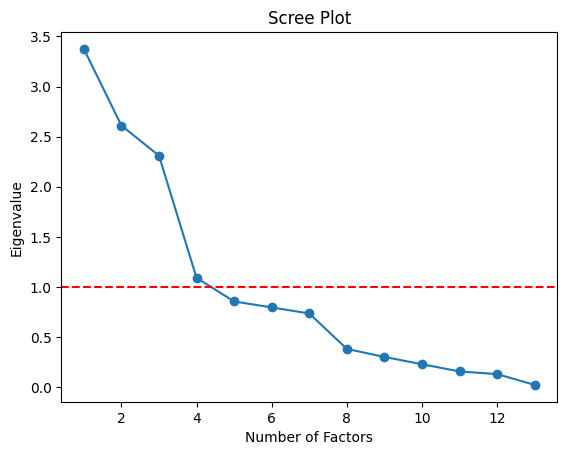

In [12]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion threshold
plt.show()

In [13]:
fa = FactorAnalyzer(n_factors=num_factors_kaiser, rotation='varimax')
fa.fit(crime_data_selected)

FactorAnalyzer(n_factors=np.int64(4), rotation='varimax', rotation_kwargs={})

In [14]:
fa_loadings = pd.DataFrame(data=fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=crime_data_selected.columns)
fa_loadings

,Factor 1,Factor 2,Factor 3,Factor 4
bus_stops_distance_0.1,0.019802,-0.138953,-0.285932,-0.042663
alleylights_distance_0.1,-0.010163,-0.063334,0.536214,0.331269
police_stations_distance_1,-0.022459,0.049106,0.392507,0.023358
streetlights_oneout_distance_0.1,-0.070287,0.833036,0.195191,-0.014694
streetlights_allout_distance_0.5,-0.020615,0.016404,0.403846,0.728035
streetlights_oneout_distance_0.3,-0.057512,0.810975,0.162813,0.152009
streetlights_allout_distance_0.3,-0.013942,-0.001023,0.158852,0.927750
bike_rides_within_0.5_and_15_min,0.893216,-0.019220,-0.022690,0.003399
area_crimes_3_hours_prev,-0.029643,0.698945,0.012835,-0.047337
area_crimes_1_hours_prev,-0.022886,0.560952,0.024673,-0.039250


In [15]:
fa_five = FactorAnalyzer(n_factors=5, rotation='varimax')
fa_five.fit(crime_data_selected)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [16]:
fa_five_loadings = pd.DataFrame(data=fa_five.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index=crime_data_selected.columns)
fa_five_loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
bus_stops_distance_0.1,0.020857,-0.286893,-0.042758,-0.101627,-0.084650
alleylights_distance_0.1,-0.010007,0.536257,0.335304,-0.053518,-0.036819
police_stations_distance_1,-0.022316,0.387733,0.022789,0.065944,-0.005562
streetlights_oneout_distance_0.1,-0.069216,0.190515,-0.053281,0.937121,0.293115
streetlights_allout_distance_0.5,-0.020259,0.397992,0.730379,0.055631,-0.030424
streetlights_oneout_distance_0.3,-0.062259,0.158308,0.136723,0.738569,0.346468
streetlights_allout_distance_0.3,-0.013664,0.159406,0.921767,0.030156,-0.022053
bike_rides_within_0.5_and_15_min,0.893376,-0.023715,0.003106,-0.006190,-0.014889
area_crimes_3_hours_prev,-0.032925,0.033556,-0.026015,0.229665,0.958074
area_crimes_1_hours_prev,-0.030117,0.054962,-0.031066,0.224125,0.564260


In [17]:
def evaluate_factors(factor_df, threshold):
    s = 0
    for factor in factor_df:
        features = list(factor_df[factor_df[factor] > threshold].index)
        features_with_vals = [(feature, float(round(factor_df[factor][feature], 3))) for feature in features]
        print(factor, features_with_vals)

        s += sum([val for (feature,val) in features_with_vals])
    print(f'Cummulative Factor Loadings: {s}')
    return

In [18]:
evaluate_factors(fa_loadings, 0.4)

Factor 1 [('bike_rides_within_0.5_and_15_min', 0.893), ('bike_rides_within_0.1_and_10_min', 0.996), ('bike_rides_within_0.1_and_5_min', 0.964)]
Factor 2 [('streetlights_oneout_distance_0.1', 0.833), ('streetlights_oneout_distance_0.3', 0.811), ('area_crimes_3_hours_prev', 0.699), ('area_crimes_1_hours_prev', 0.561)]
Factor 3 [('alleylights_distance_0.1', 0.536), ('streetlights_allout_distance_0.5', 0.404), ('alleylights_distance_0.3', 0.913)]
Factor 4 [('streetlights_allout_distance_0.5', 0.728), ('streetlights_allout_distance_0.3', 0.928)]
Cummulative Factor Loadings: 9.266


In [19]:
evaluate_factors(fa_five_loadings, 0.4)

Factor 1 [('bike_rides_within_0.5_and_15_min', 0.893), ('bike_rides_within_0.1_and_10_min', 0.997), ('bike_rides_within_0.1_and_5_min', 0.964)]
Factor 2 [('alleylights_distance_0.1', 0.536), ('alleylights_distance_0.3', 0.923)]
Factor 3 [('streetlights_allout_distance_0.5', 0.73), ('streetlights_allout_distance_0.3', 0.922)]
Factor 4 [('streetlights_oneout_distance_0.1', 0.937), ('streetlights_oneout_distance_0.3', 0.739)]
Factor 5 [('area_crimes_3_hours_prev', 0.958), ('area_crimes_1_hours_prev', 0.564)]
Cummulative Factor Loadings: 9.163


##### Factor Scores over Districts

In [20]:
transformed_data = pd.DataFrame(fa_five.transform(crime_data_selected), columns=['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity'])
crime_data_with_factors = pd.concat([crime_data, transformed_data], axis=1)

In [21]:
factors_by_district = crime_data_with_factors.groupby('district')[['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity']].agg('mean').reset_index()
factors_by_district

,district,Bike Activity,Alleylight Availability,Streetlight Outages,Partial Streetlight Outages,Recent Crime Activity
0,1,-0.126726,-1.492333,2.454455,1.381018,-0.402733
1,2,-0.096396,0.356097,0.451855,-0.167705,-0.254221
2,3,-0.073171,1.106597,0.837109,-0.029037,-0.234796
3,4,-0.224365,1.497392,1.342393,-0.538396,-0.102893
4,5,-0.203164,0.595343,-0.305406,1.608509,-0.190236
5,6,-0.079226,1.604636,0.446764,-0.345858,-0.196829
6,7,-0.112073,2.500923,-0.339536,0.722567,0.156037
7,8,0.030688,-0.286795,-0.139925,-0.384918,-0.170363
8,9,1.095791,0.214175,0.683933,-0.287347,-0.107459
9,10,-0.078714,0.886542,1.027945,-0.151741,-0.205853


##### Bringing In Other Geo Data

In [22]:
clean_police_districts = pd.read_csv('../../data/processed/clean_police_districts.csv')
clean_areas = pd.read_csv('../../data/processed/clean_areas.csv')
disadvantaged_areas_within_areas = pd.read_csv('../../data/processed/disadvantaged_areas_within_areas.csv')

In [23]:
def parse_polygon(polygon_string):
    points = polygon_string.strip('POLYGON ((').strip('))').split(', ')
    points = [tuple(map(float, point.split())) for point in points]
    return Polygon(points)

In [24]:
def swap_coordinates(polygon):
    if polygon.is_empty:
        return polygon
    swapped_coords = [(y, x) for x, y in polygon.exterior.coords]
    return Polygon(swapped_coords)

In [25]:
clean_police_districts['geom'] = clean_police_districts['geom'].apply(parse_polygon)
clean_police_districts['geom'] = clean_police_districts['geom'].apply(swap_coordinates)
clean_police_districts.head()

,district,geom,disadvantaged_score,disadvantaged_score.1,centroid,status,areas
0,17,POLYGON ((-87.71067089391354 41.99736565536943...,0.0,0.0,0.0,0.0,0.0
1,20,POLYGON ((-87.66029423572358 41.99091633853977...,4.0,4.0,4.0,4.0,4.0
2,31,POLYGON ((-87.82817787271652 41.98384222028714...,0.0,0.0,0.0,0.0,0.0
3,31,POLYGON ((-87.83365455160555 41.97535481526603...,0.0,0.0,0.0,0.0,0.0
4,19,POLYGON ((-87.64491798568677 41.96972709381482...,2.0,2.0,2.0,2.0,2.0


In [26]:
clean_areas['poly'] = clean_areas['poly'].apply(parse_polygon)
clean_areas['poly'] = clean_areas['poly'].apply(swap_coordinates)
clean_areas.head()

,id,poly,district
0,35,POLYGON ((-87.60914087617894 41.84469250265398...,2
1,36,POLYGON ((-87.59215283879394 41.81692934626684...,2
2,37,POLYGON ((-87.62879823733725 41.80189303368919...,9
3,38,"POLYGON ((-87.6067081256125 41.81681377057218,...",2
4,39,POLYGON ((-87.59215283879394 41.81692934626684...,2


In [27]:
disadvantaged_areas_within_areas['poly'] = disadvantaged_areas_within_areas['poly'].apply(parse_polygon)
disadvantaged_areas_within_areas['poly'] = disadvantaged_areas_within_areas['poly'].apply(swap_coordinates)
disadvantaged_areas_within_areas['id'] = disadvantaged_areas_within_areas.index
disadvantaged_areas_within_areas.head()

,poly,district,areas,id
0,POLYGON ((-87.57366299996758 41.70796600003142...,4,51,0
1,POLYGON ((-87.60151899995586 41.68632499999862...,5,50,1
2,POLYGON ((-87.60036199996543 41.69284299996604...,5,50,2
3,POLYGON ((-87.62032800000847 41.69942700001048...,5,49,3
4,POLYGON ((-87.66036699995497 41.75771799998948...,6,71,4


In [28]:
district_to_areas = {}
for idx, row in clean_areas.iterrows():
    if row['district'] in district_to_areas.keys():
        district_to_areas[row['district']].append((row['id'], row['poly']))
    else:
        district_to_areas[row['district']] = [(row['id'], row['poly'])]

In [29]:
disadvantaged_areas_to_areas = {}
for idx, row in disadvantaged_areas_within_areas.iterrows():
    if row['areas'] in disadvantaged_areas_to_areas.keys():
        disadvantaged_areas_to_areas[row['areas']].append((row['id'], row['poly']))
    else:
        disadvantaged_areas_to_areas[row['areas']] = [(row['id'], row['poly'])]

In [30]:
def determine_area_for_crimes(df, perc):
    statuses = []
    areas, dis_areas = [], []
    perc_cnt = perc

    for i in range(len(df)):
        point = geometry.Point(df.loc[i, 'long'], df.loc[i, 'lat'])
        status = 0

        curr_area = None
        for (area, geom) in district_to_areas[df.loc[i, 'district']]:
            curr_area = area
            if (geom.contains(point)): 
                status = 1
                break
        statuses.append(status)
        areas.append(curr_area)

        curr_dis_area = None
        if curr_area in disadvantaged_areas_to_areas:
            for (dis_area, geom) in disadvantaged_areas_to_areas[curr_area]:
                if (geom.contains(point)): 
                    curr_dis_area = dis_area
                    break
        dis_areas.append(curr_dis_area)

        if i > 0 and i % (round(len(df) * (perc_cnt/100))) == 0:
            print(f"{perc_cnt}%- Row {i}/{len(df)} completed")
            perc_cnt += perc

    df['status'] = statuses
    df['areas'] = areas
    df['dis_areas'] = dis_areas
    df = df[df['status'] == 1].drop(['status'], axis=1)

    return df

In [31]:
crime_data_with_factors_and_areas = determine_area_for_crimes(crime_data_with_factors, 5)

5%- Row 746498/14929952 completed
10%- Row 1492995/14929952 completed
15%- Row 2239493/14929952 completed
20%- Row 2985990/14929952 completed
25%- Row 3732488/14929952 completed
30%- Row 4478986/14929952 completed
35%- Row 5225483/14929952 completed
40%- Row 5971981/14929952 completed
45%- Row 6718478/14929952 completed
50%- Row 7464976/14929952 completed
55%- Row 8211474/14929952 completed
60%- Row 8957971/14929952 completed
65%- Row 9704469/14929952 completed
70%- Row 10450966/14929952 completed
75%- Row 11197464/14929952 completed
80%- Row 11943962/14929952 completed
85%- Row 12690459/14929952 completed
90%- Row 13436957/14929952 completed
95%- Row 14183454/14929952 completed


In [32]:
factors_by_area = crime_data_with_factors_and_areas.groupby('areas')[['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity']].agg('mean').reset_index()
factors_by_area

,areas,Bike Activity,Alleylight Availability,Streetlight Outages,Partial Streetlight Outages,Recent Crime Activity
0,1,-0.054135,1.601216,0.122341,-0.208029,-0.275767
1,2,-0.095265,0.415581,0.181863,0.012731,-0.292407
2,3,-0.086652,0.388905,0.563630,0.388005,-0.362159
3,4,-0.171346,-0.046755,0.106277,-0.330950,-0.221313
4,5,-0.064669,1.783977,-0.103097,-0.115380,-0.332520
...,...,...,...,...,...,...
72,73,-0.229639,-0.537408,3.044269,-0.009866,-0.165840
73,74,-0.145113,-0.124816,0.259295,-0.143759,-0.264456
74,75,-0.106087,0.749233,0.699065,-0.104999,-0.283456
75,76,-0.210029,-0.854279,0.274080,0.021455,-0.269581


In [33]:
factors_by_dis_area = crime_data_with_factors_and_areas.groupby('dis_areas')[['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity']].agg('mean').reset_index()
factors_by_dis_area

,dis_areas,Bike Activity,Alleylight Availability,Streetlight Outages,Partial Streetlight Outages,Recent Crime Activity
0,0.0,-0.165707,-0.502580,1.541334,-0.268792,-0.177894
1,1.0,-0.098763,0.166244,0.222600,-0.428010,-0.212208
2,2.0,-0.090029,-0.222575,0.398049,-0.329250,-0.216608
3,3.0,-0.053002,0.740545,1.364021,-0.048420,-0.218554
4,4.0,0.065420,3.181793,0.046126,-0.194933,-0.299193
...,...,...,...,...,...,...
254,268.0,0.024866,4.328993,-0.467451,-1.087883,-0.191489
255,269.0,-0.065332,1.127868,-0.130856,0.030959,-0.324702
256,270.0,0.222521,4.135758,0.671307,-0.416670,-0.278224
257,271.0,0.052887,3.241087,0.295418,-0.562637,-0.252109


In [34]:
factors_by_area.rename(columns={'areas':'area'}, inplace=True)
clean_areas.rename(columns={'id':'area', 'poly':'geom'}, inplace=True)

factors_by_dis_area.rename(columns={'dis_areas':'area'}, inplace=True)
disadvantaged_areas_within_areas.rename(columns={'id':'area', 'poly':'geom'}, inplace=True)

In [35]:
geo_districts = gpd.GeoDataFrame(clean_police_districts[['district','geom']], geometry='geom')
geo_areas = gpd.GeoDataFrame(clean_areas[['area','geom']], geometry='geom')
geo_dis_areas = gpd.GeoDataFrame(disadvantaged_areas_within_areas[['area','geom']], geometry='geom')

In [36]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

In [37]:
def normalize_and_merge(geo_df, factors_df, exclude_columns, merge_column):
    scaler = MinMaxScaler()
    factor_columns = factors_df.drop(columns=exclude_columns)
    normalized_factors = pd.DataFrame(scaler.fit_transform(factor_columns), 
                                      columns=factor_columns.columns, 
                                      index=factors_df[exclude_columns[0]])
    normalized_df = pd.concat([factors_df[exclude_columns], normalized_factors], axis=1)
    merged_gdf = geo_df.merge(normalized_df, on=merge_column)
    return merged_gdf

In [38]:
def plot_normalized_heatmap(geo_df, factors_df, factor_column, t, title, threshold=0.1, label=True, background=True, savefig=None):
    merged_gdf = normalize_and_merge(geo_df, factors_df, [t], t)
    fig, ax = plt.subplots(figsize=(8, 8), facecolor="#f9f9f6")
    ax.set_facecolor("#e0e0e0")

    if background:
        chicago.plot(color='lightgrey', alpha=1, ax=ax)

    merged_gdf.plot(column=factor_column, cmap='OrRd', ax=ax)

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.036, pad=0.1)
    cbar.set_ticks([0, 1])
    cbar.ax.set_xticklabels(['Low', 'High'])

    # Remove black frame from the colorbar
    cbar.outline.set_visible(False)

    if label:
        for _, row in merged_gdf.iterrows():
            if row[factor_column] > 1 - threshold:
                plt.text(row.geom.centroid.x, row.geom.centroid.y, s=row[t], 
                    horizontalalignment='center', verticalalignment='center', fontsize=10, color='white', fontweight='bold')
            elif row[factor_column] < threshold:
                plt.text(row.geom.centroid.x, row.geom.centroid.y, s=row[t], 
                        horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', fontweight='bold')      

    tit = f"The Impact of {factor_column} On Each \n {title}'s Total Crime"

    plt.title(tit, fontsize=14, pad=14)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    if savefig is not None:
        plt.savefig(savefig)

    plt.show()

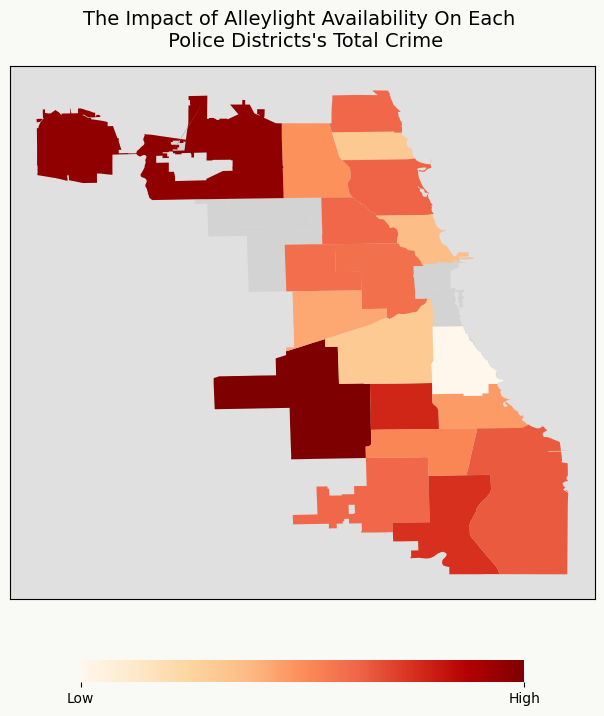

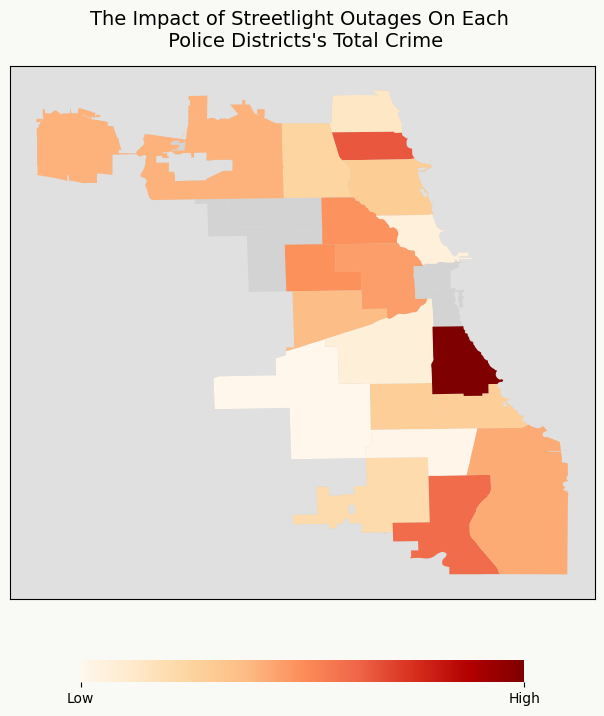

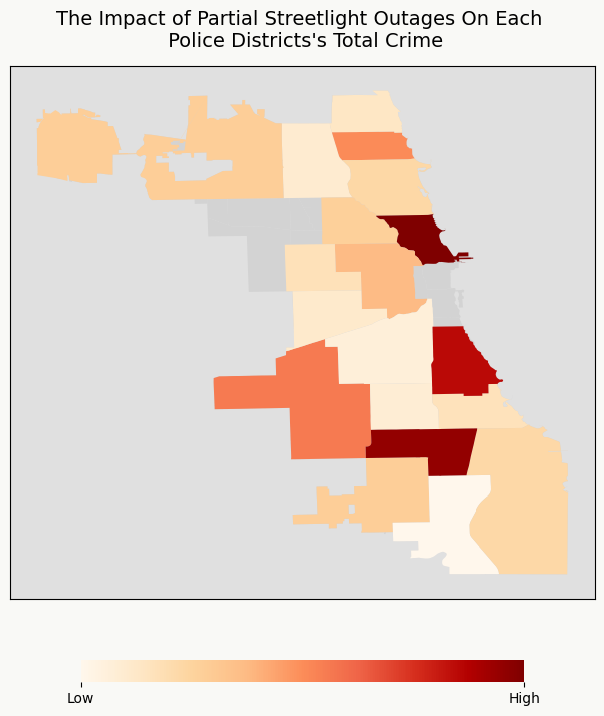

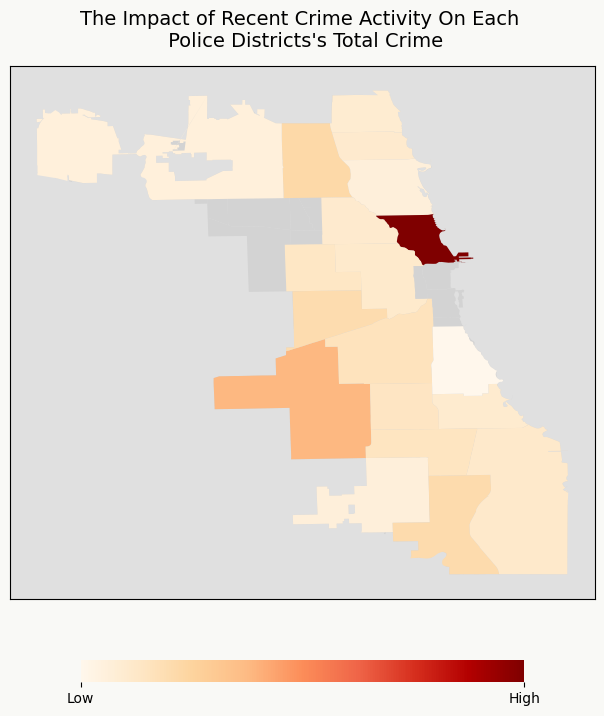

In [39]:
for factor_col in factors_by_district.columns[2:]:
    plot_normalized_heatmap(geo_districts, factors_by_district, factor_col, 'district', 'Police Districts', label=False, savefig=f'../results/analysis/district_{factor_col.replace(' ', '_').lower()}_heatmap.png')

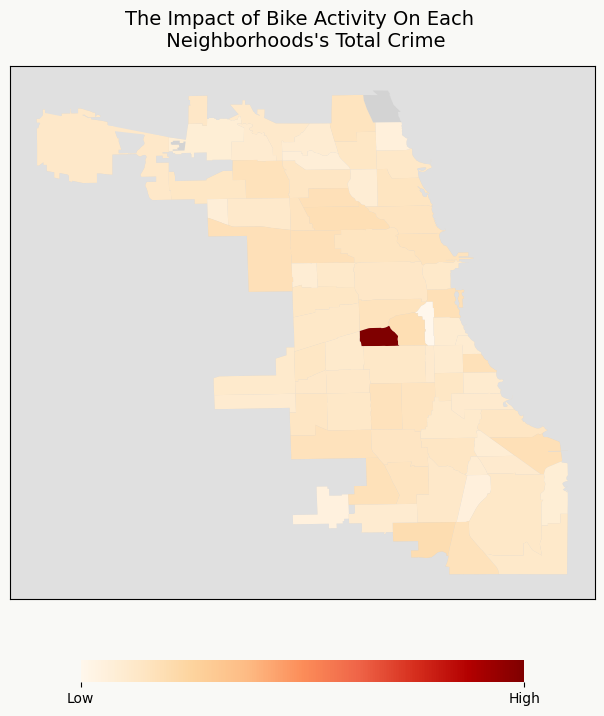

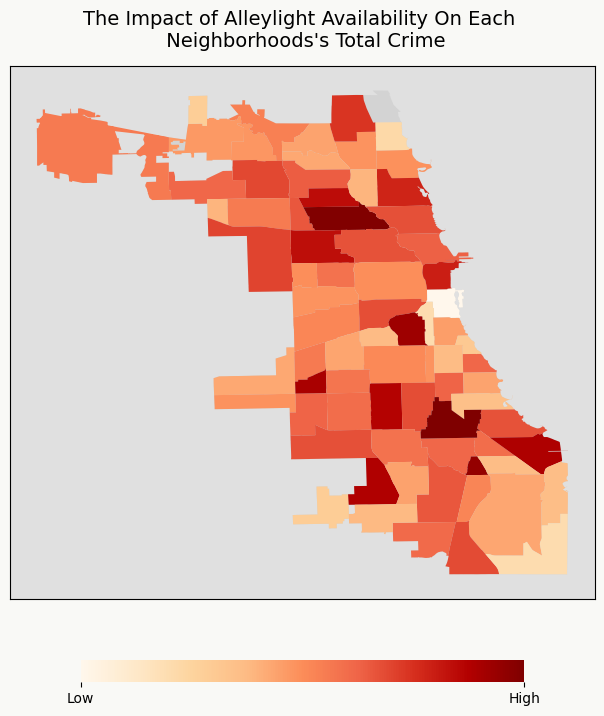

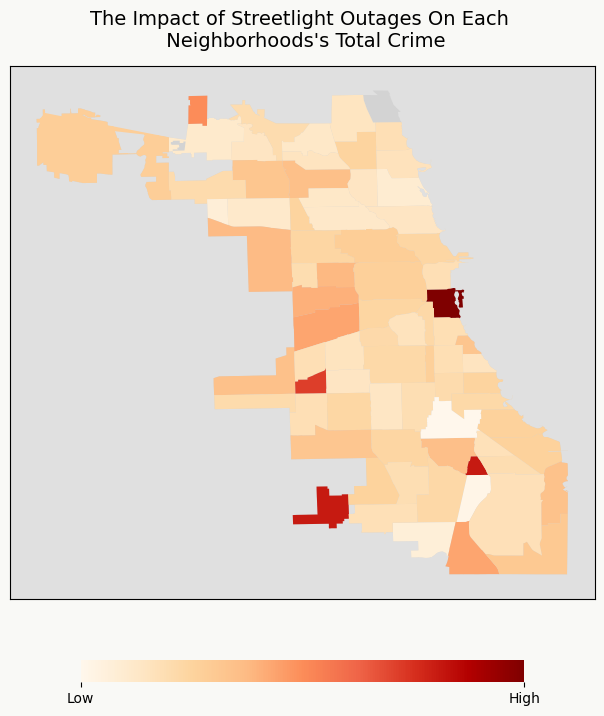

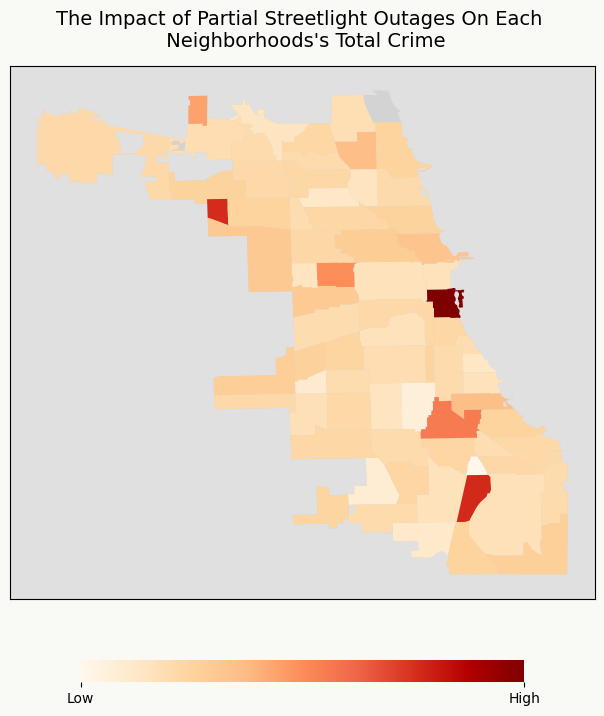

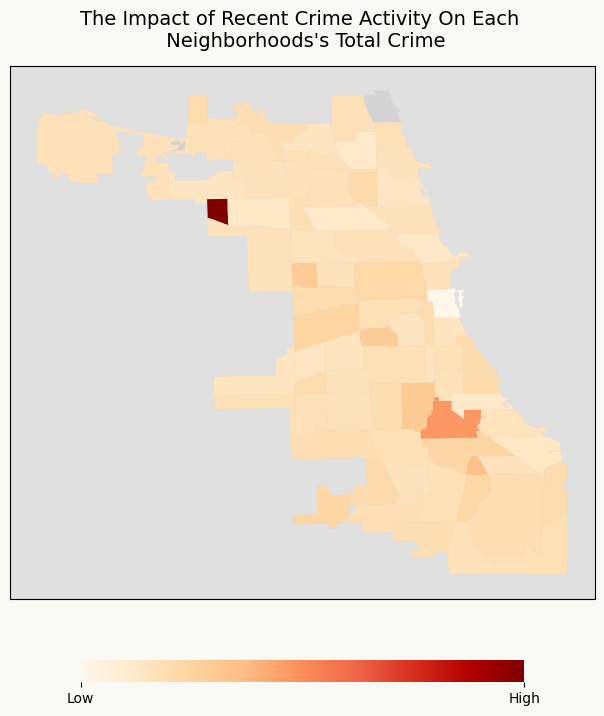

In [40]:
for factor_col in factors_by_area.columns[1:]:
    plot_normalized_heatmap(geo_areas, factors_by_area, factor_col, 'area', 'Neighborhoods', label=False, savefig=f'../results/analysis/area_{factor_col.replace(' ', '_').lower()}_heatmap.png')

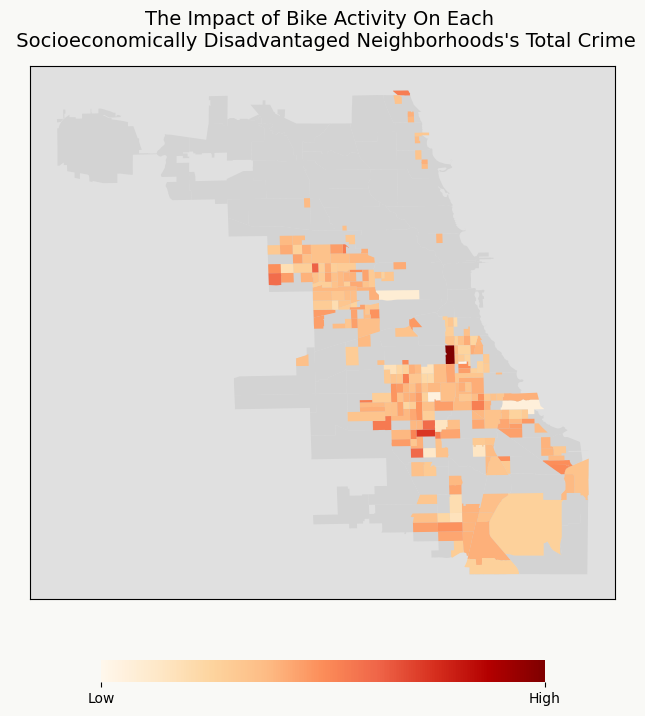

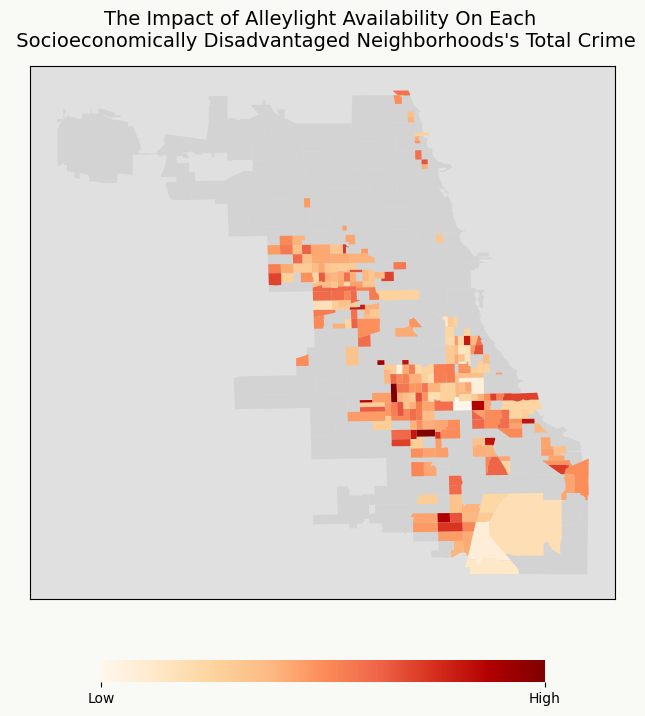

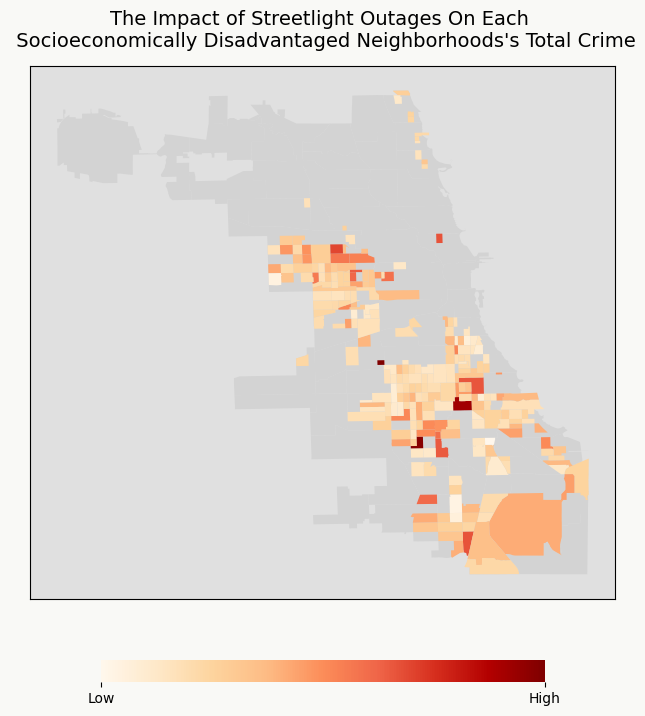

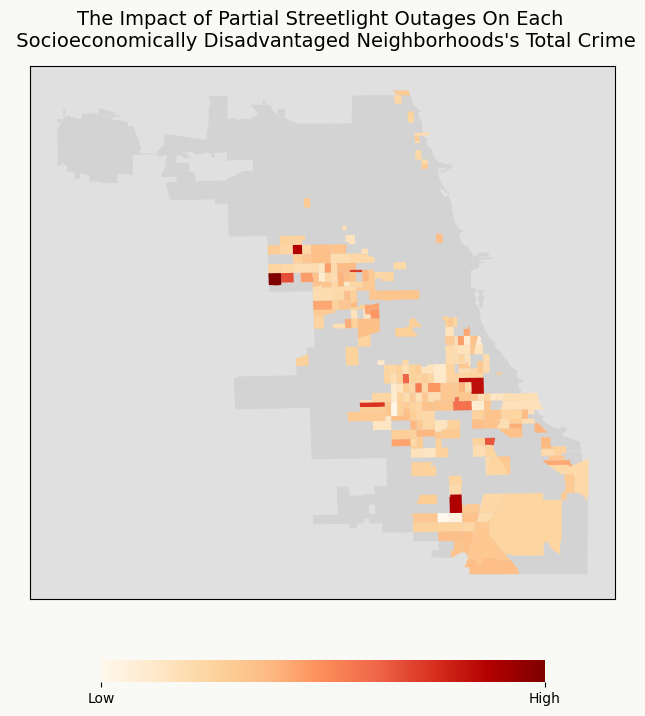

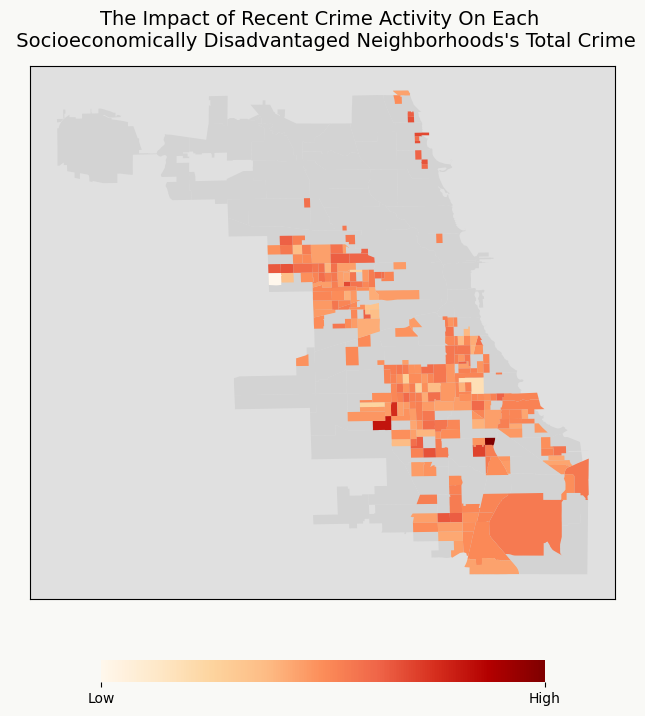

In [41]:
for factor_col in factors_by_dis_area.columns[1:]:
    plot_normalized_heatmap(geo_dis_areas, factors_by_dis_area, factor_col, 'area', 'Socioeconomically Disadvantaged Neighborhoods', label=False, savefig=f'../results/analysis/dis_area_{factor_col.replace(' ', '_').lower()}_heatmap.png')

In [42]:
# normal factor analysis visual

In [43]:
factors_by_district_sum = crime_data_with_factors.groupby('district')[['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity']].agg('sum').reset_index()
factors_by_area_sum = crime_data_with_factors_and_areas.groupby('areas')[['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity']].agg('sum').reset_index()
factors_by_dis_area_sum = crime_data_with_factors_and_areas.groupby('dis_areas')[['Bike Activity', 'Alleylight Availability', 'Streetlight Outages', 'Partial Streetlight Outages', 'Recent Crime Activity']].agg('sum').reset_index()

In [44]:
factors_by_area_sum.rename(columns={'areas':'area'}, inplace=True)
factors_by_dis_area_sum.rename(columns={'dis_areas':'area'}, inplace=True)

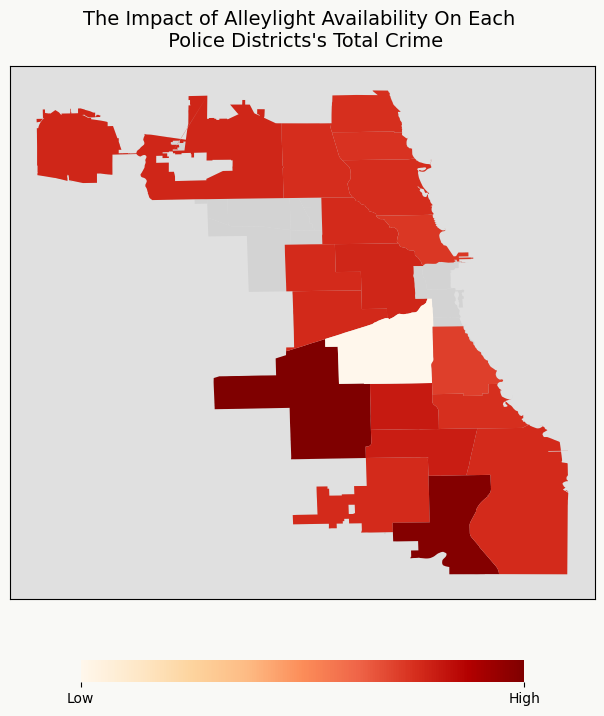

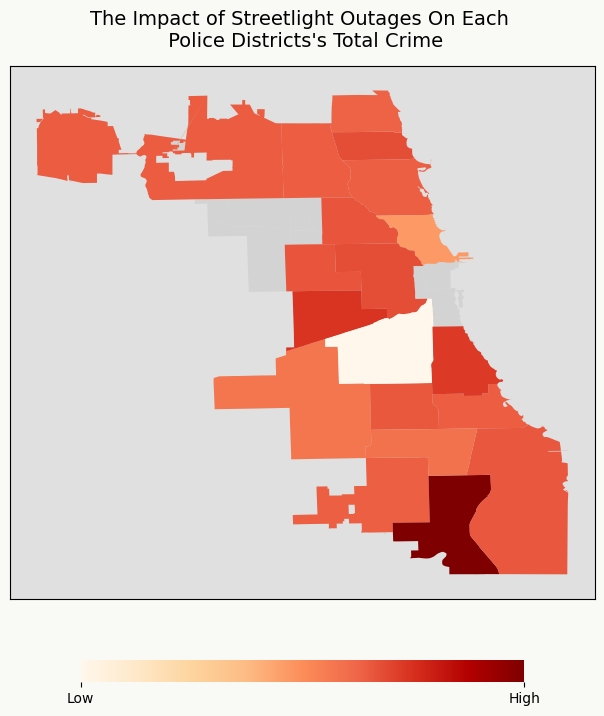

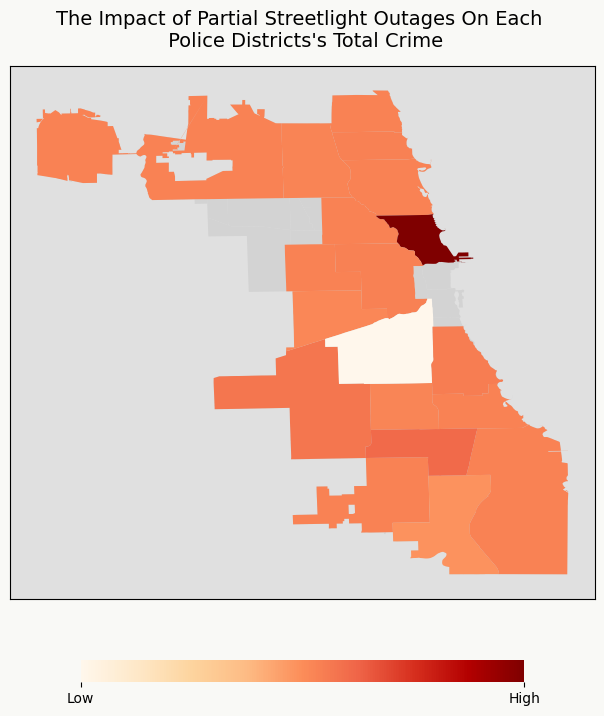

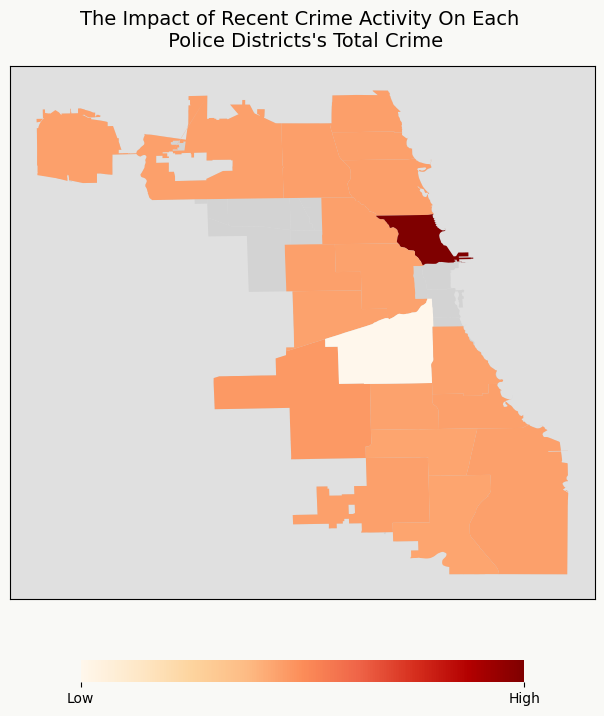

In [45]:
for factor_col in factors_by_district_sum.columns[2:]:
    plot_normalized_heatmap(geo_districts, factors_by_district_sum, factor_col, 'district', 'Police Districts', label=False, savefig=f'../results/analysis/district_{factor_col.replace(' ', '_').lower()}_sum_heatmap.png')

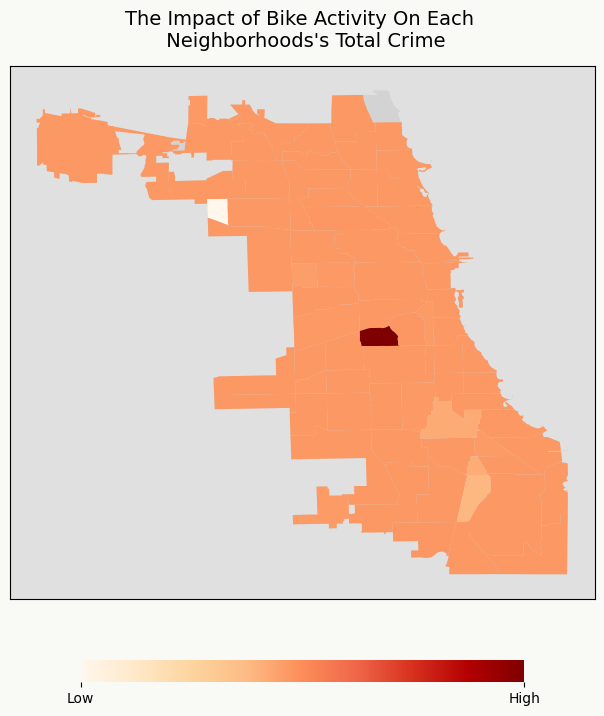

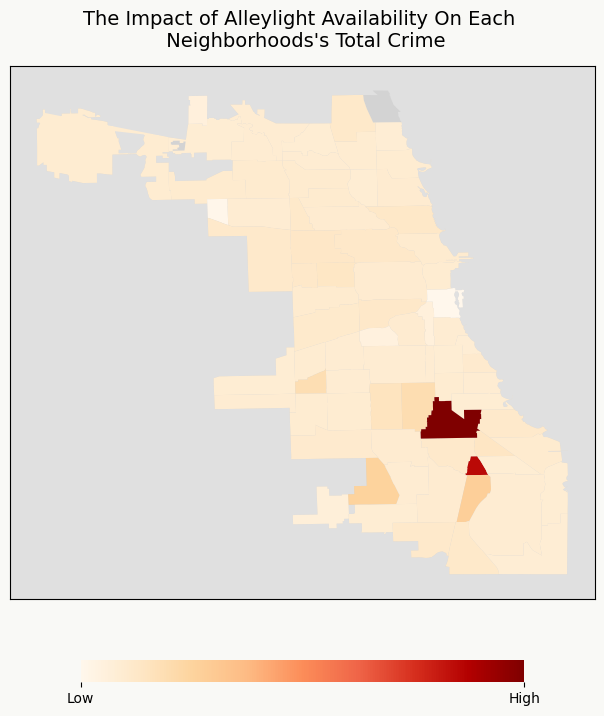

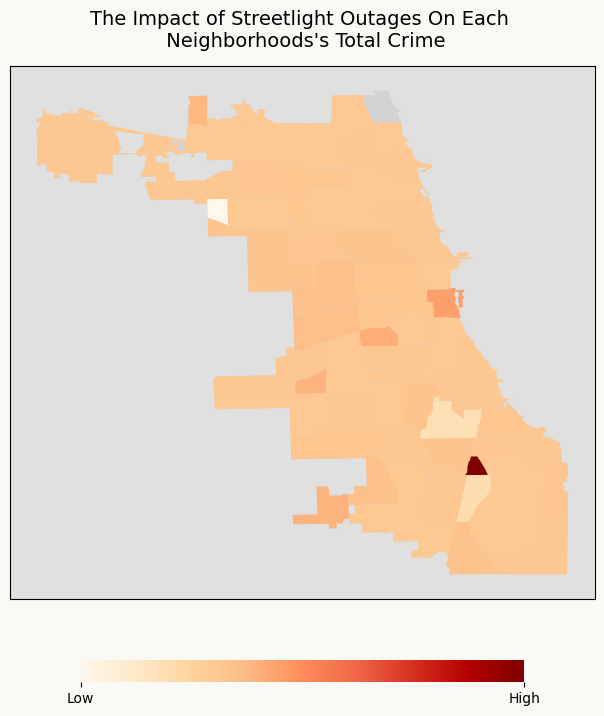

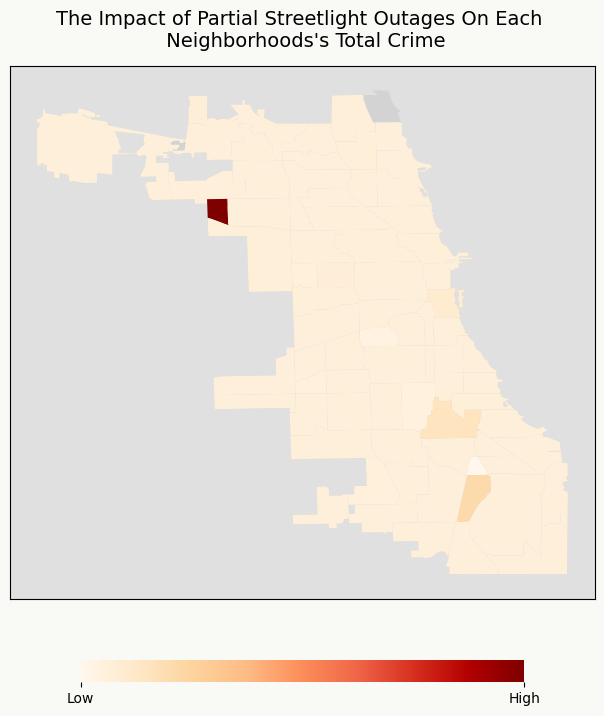

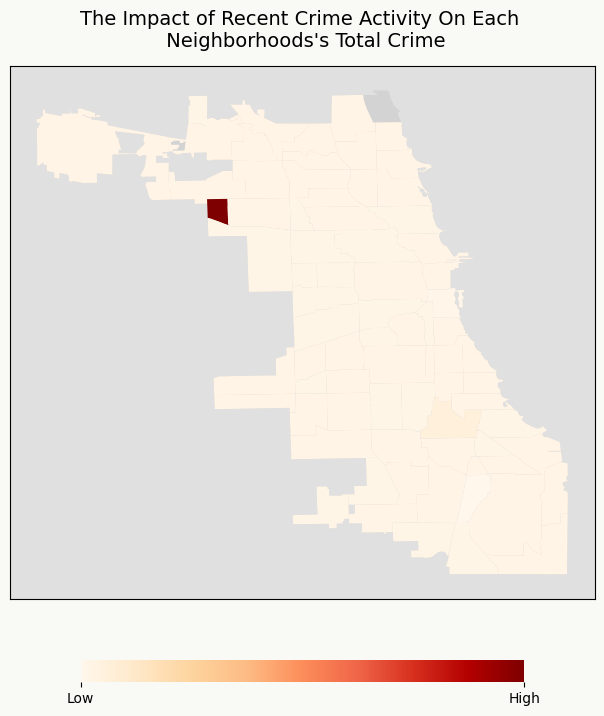

In [46]:
for factor_col in factors_by_area_sum.columns[1:]:
    plot_normalized_heatmap(geo_areas, factors_by_area_sum, factor_col, 'area', 'Neighborhoods', label=False, savefig=f'../results/analysis/area_{factor_col.replace(' ', '_').lower()}_sum_heatmap.png')

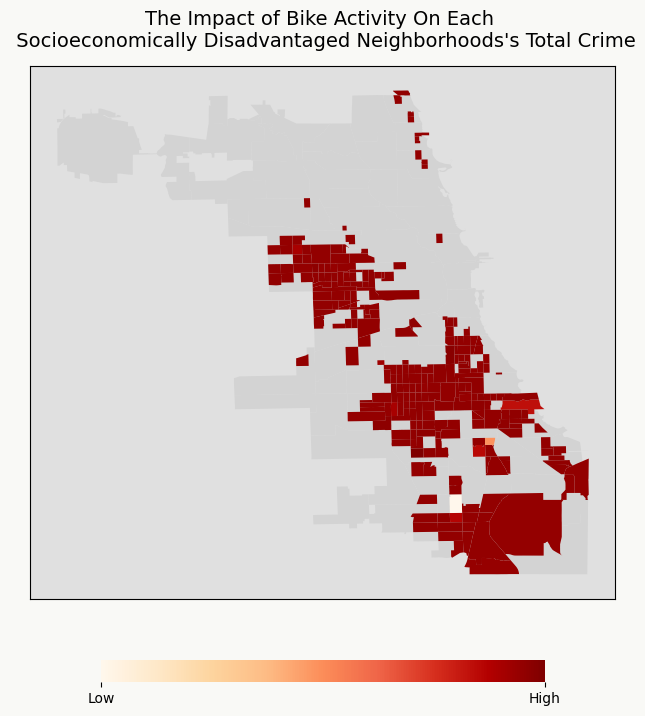

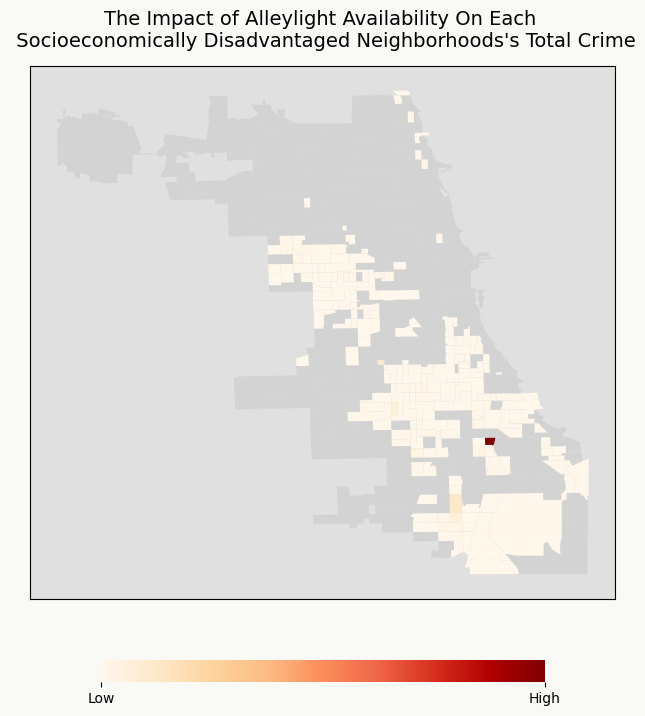

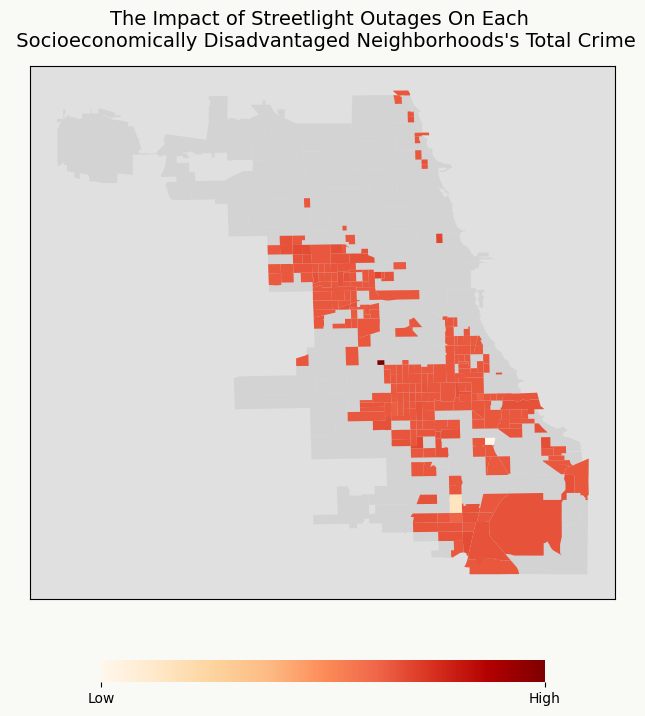

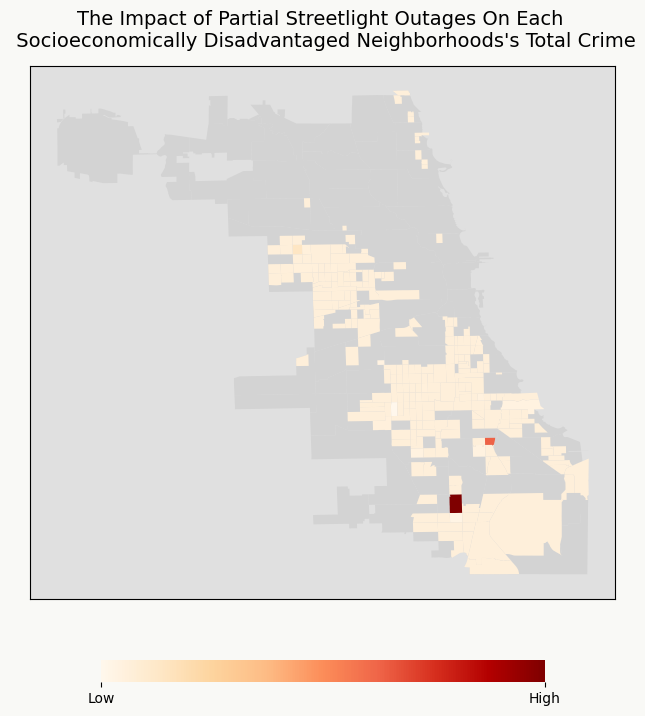

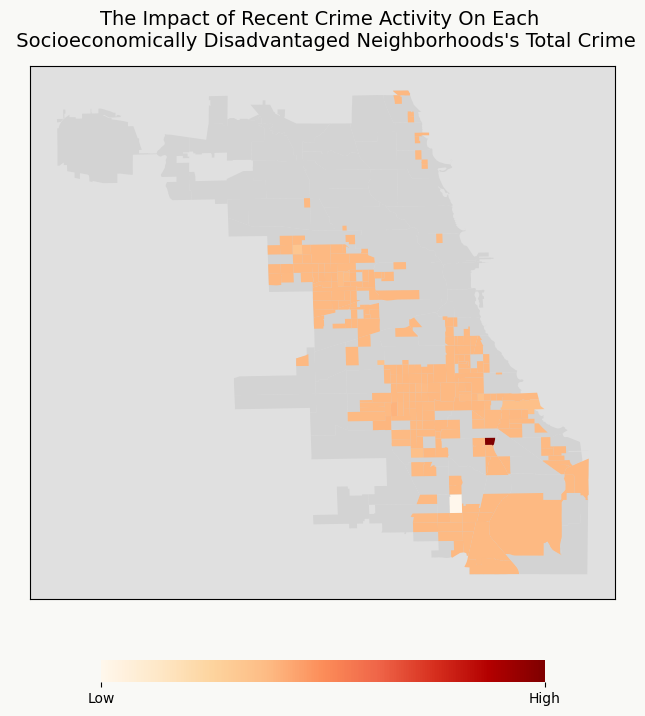

In [47]:
for factor_col in factors_by_dis_area_sum.columns[1:]:
    plot_normalized_heatmap(geo_dis_areas, factors_by_dis_area_sum, factor_col, 'area', 'Socioeconomically Disadvantaged Neighborhoods', label=False, savefig=f'../results/analysis/dis_area_{factor_col.replace(' ', '_').lower()}_sum_heatmap.png')